# Plotting av *bulekoeffisienten* $C$ 
I denne notebooken skal vi beregne og plotte bulekoeffisienten $C$ for trykkspenninger parallelt med plateretningen og på tverrs av plateretningen,   
Vi skal her benytte oss av to biblioteker som ikke er del av standardbiblioteket til Python: 
- Numpy. Denne skal hjelpe oss å lage et intervall av punkter for $\psi$
- Matplotlib. Standard plottebibliotek som skal hjelpe oss å lage presentable plot av $C$


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Spenningsretning langs plateretningen
Vi definerer her spenningsretningen som virker på kortsiden av platen og har retning parallelt med lengste kant som "langs plateretningen"

I bulekoeffisientarket svarer dette til tilfelle a), b) og c). <br>

NB! Vi ser her bort fra tilfelle b) da tilfelle c) gir samme verdi for $ \psi = -1 $

![buleark](https://cdn.jsdelivr.net/gh/skipsing/skipsdesign4/knekking-buling/images/bulekoeffisient_langs.PNG)

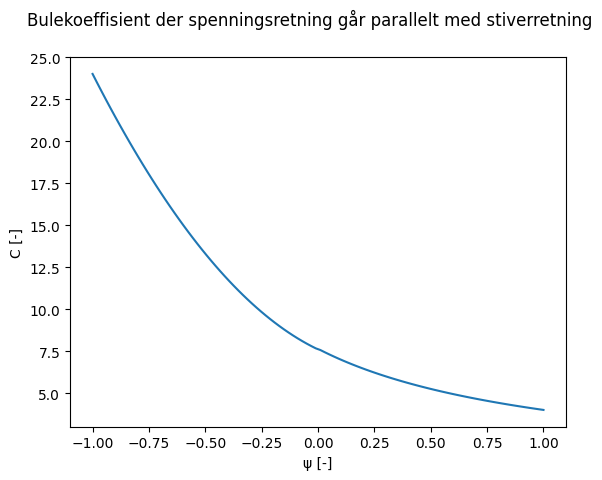

In [4]:

%matplotlib inline

# Itererbart intervall for psi fra -1 til 1
psi_interval = np.linspace(-1 , 1 , 100 )

x_verdier = []
y_verdier = []

for psi in psi_interval: 
    # Ved strekk 
    if psi < 0:
        bulekoeffisient = 7.6 - 6.4 * psi + 10 * psi ** 2
    # Ingen strekk
    else:
        bulekoeffisient = 8.4 / ( psi + 1.1 )
    # Lagrer i lister for plot
    x_verdier.append(psi) 
    y_verdier.append(bulekoeffisient)



# Plotter

plt.suptitle('Bulekoeffisient der spenningsretning går parallelt med stiverretning')
plt.ylabel('C [-]')
plt.xlabel('ψ [-]')
plt.plot(x_verdier , y_verdier)
plt.show()



## Spørsmål

1) Vil bulekapasiteten til platefeltet her være avhengig av stiveravstanden $s$ ? , og hva med webrammeavstanden $l$ ? 
2) 



In [1]:
%reset

## Spenning parallelt med kortsiden 

![buleark](https://cdn.jsdelivr.net/gh/skipsing/skipsdesign4/knekking-buling/images/bulekoeffisient_tverrs.PNG)

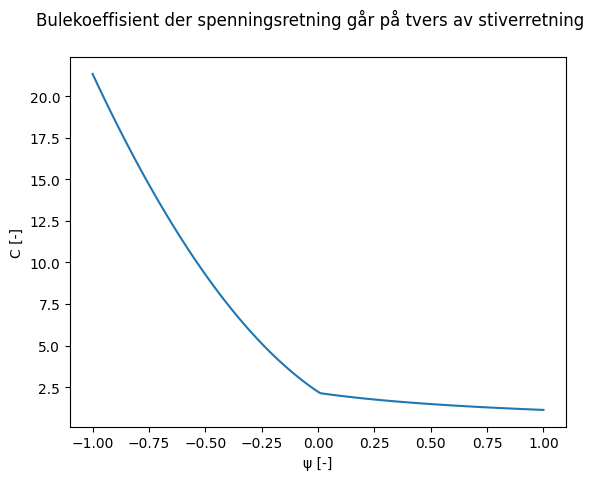

In [5]:
%matplotlib inline

# Itererbart intervall for psi fra -1 til 1
psi_interval = np.linspace( -1 , 1 , 100 )

# aspektforhold plate
s_over_l = 0.25

C_e0 = (1 + ( s_over_l )**2 )**2 * ((2.1) / ( 0 + 1.1))

x_verdier = []
y_verdier = []

for psi in psi_interval: 
    # Ved strekk 
    if psi < 0:
        if s_over_l**(-1) <= (3/2 ): 
            C_f = 24 * (s_over_l)**2 

        else :
            C_f = 2 + 16 * ( s_over_l )**2 + 8 * ( s_over_l ) ** 4 
        
        bulekoeffisient = ( 1 + abs(psi) ) * C_e0 - abs(psi) * C_f + 10 * abs(psi) * ( 1 + abs(psi) ) + ( s_over_l )**2 

#bulekoeffisient = ( 1 + psi ) * C_e0 - psi * C_f + 10 * psi * ( 1 + psi ) + ( s_over_l )**2 
        
    # Ingen strekk
    else:
        bulekoeffisient = (1 + ( s_over_l )**2 )**2 * ((2.1) / ( psi + 1.1))
        
    # Lagrer i lister for plot
    x_verdier.append(psi) 
    y_verdier.append(bulekoeffisient)


# Plotter

plt.suptitle('Bulekoeffisient der spenningsretning går på tvers av stiverretning')
plt.ylabel('C [-]')
plt.xlabel('ψ [-]')
plt.plot(x_verdier , y_verdier)
plt.show()